# Cross-validating bayes chime methods

Thanks to Mike Becker for explaining the magic of `if __name__ == "__main__":` to me.  

This branch changes bayeschime to make it work from python, rather than the command line.  It also adapt's Christian Koerber's implementation to make it run from python, rather than the command line, or the jupyter notebooks that he originally put together.


In [1]:
cd ..

/Users/crandrew/projects/chime_sims


In [2]:
from bayes_chime.bayeschime_xval import bayes_xval

In [3]:
print(bayes_xval)

<function bayes_xval at 0x7fbbd14c7b00>


Hard-coding the 7 for the notebook version, to look 7 days out.

In [4]:
tuples_for_starmap = [(7, j) for j in ['PMC', "LGH", "HUP", "CCH", 'PAH', 'MCP']]

import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())
outdicts = pool.starmap(bayes_xval, tuples_for_starmap)
pool.close()

n < 0


Show the residual plots

In [21]:
from scipy.stats import probplot
%pylab inline 

import matplotlib.pyplot as plt
def plotr(d, name):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = [10,5])
    ax[0].plot(d['hq_m'], label = "mcmc")
    ax[0].plot(d['hq_n'], label = "gaussian")
    ax[0].legend()
    ax[0].set_ylabel("quantile")
    ax[0].set_xlabel("day of past week")
    ax[0].set_title("Hosp")
    ax[1].set_ylim(0,1)
    
    ax[1].plot(d['vq_m'], label = "mcmc")
    ax[1].plot(d['vq_n'], label = "gaussian")
    ax[1].legend()
    ax[1].set_ylabel("quantile")
    ax[1].set_xlabel("day of past week")
    ax[1].set_title("Vent")
    ax[1].set_ylim(0,1)
    fig.suptitle(name)
    plt.tight_layout()



def plotq(d, name):
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,10])
    probplot(d['resh_m'], dist = "norm", plot = ax[0,0])
    ax[0,0].set_title(f"Residuals, hospital, mcmc")
    probplot(d['resh_n'], dist = "norm", plot = ax[0,1])
    ax[0,1].set_title(f"Residuals, hospital, gaussian")
    probplot(d['resv_m'], dist = "norm", plot = ax[1,0])
    ax[1,0].set_title(f"Residuals, vent, mcmc")
    probplot(d['resv_n'], dist = "norm", plot = ax[1,1])
    ax[1,1].set_title(f"Residuals, vent, gaussian")
    fig.suptitle(name)
    plt.tight_layout()




Populating the interactive namespace from numpy and matplotlib


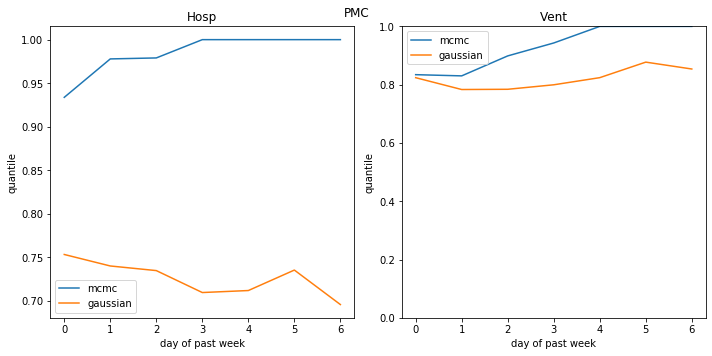

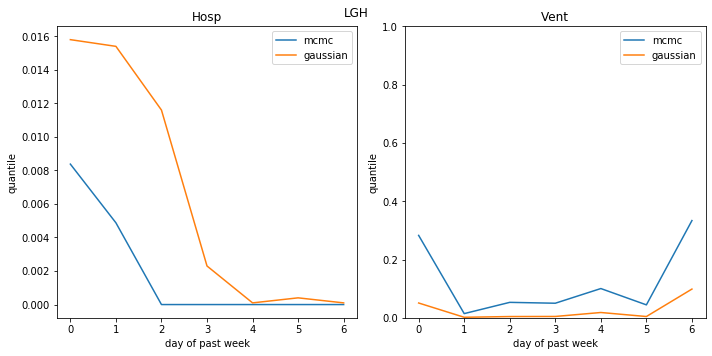

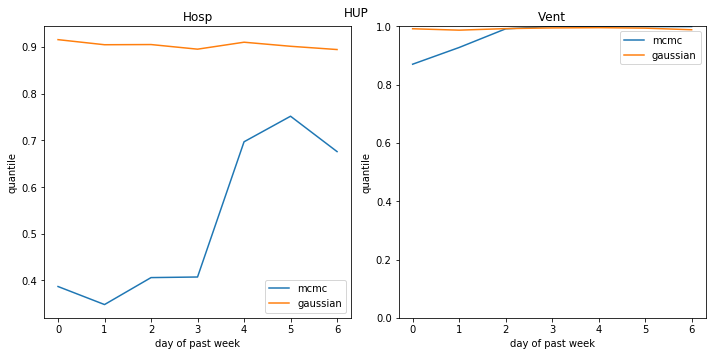

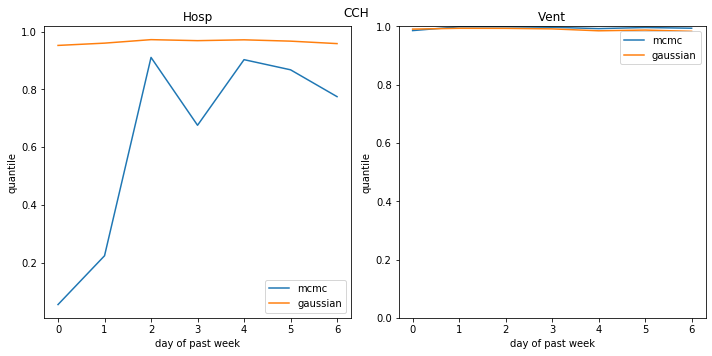

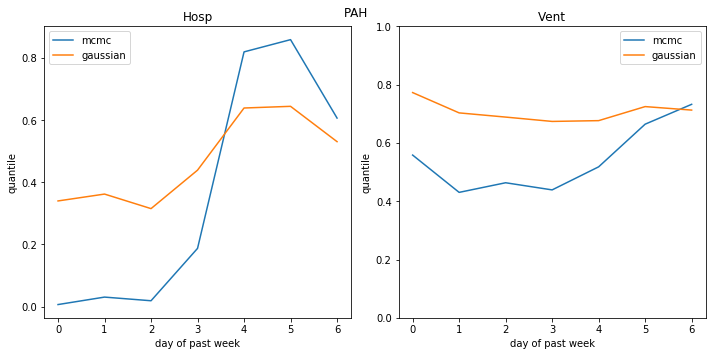

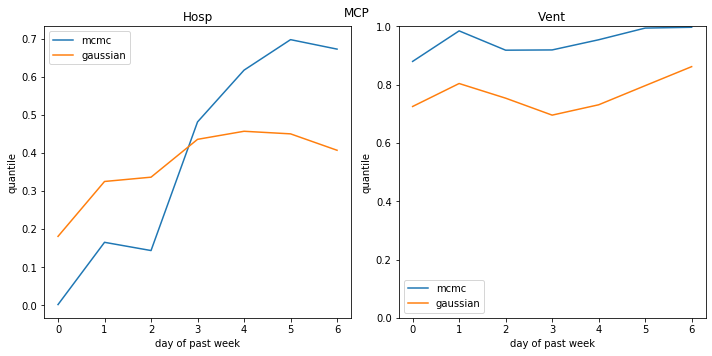

In [22]:
for i in outdicts:
    plotr(i['plotr'], i['which_hospital'])

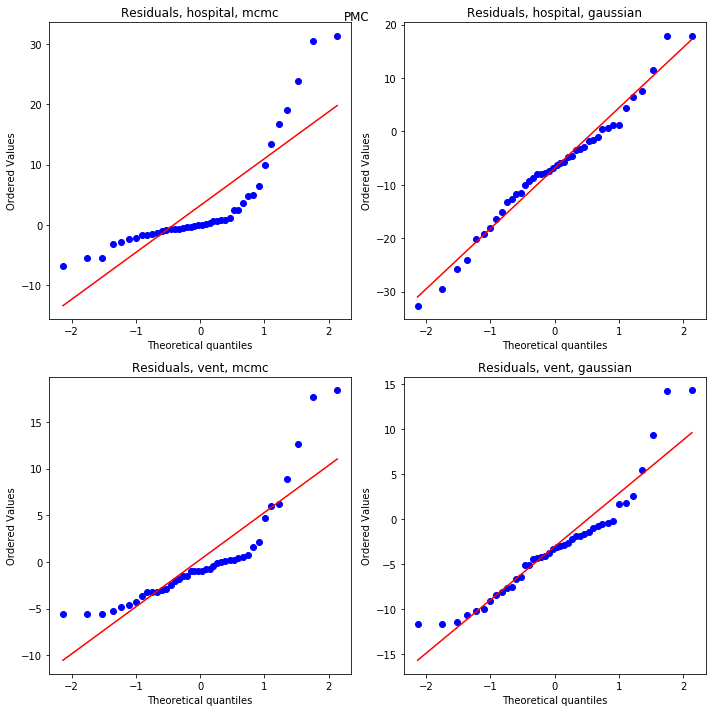

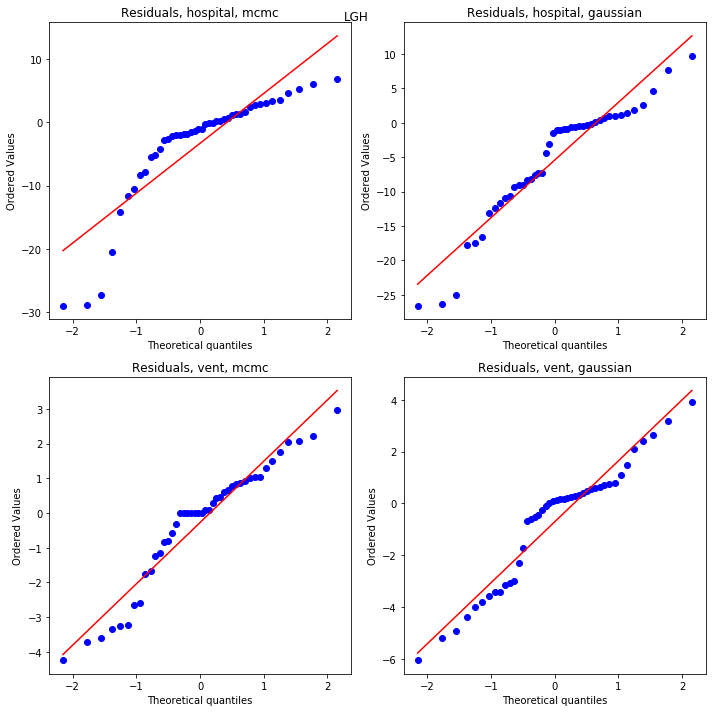

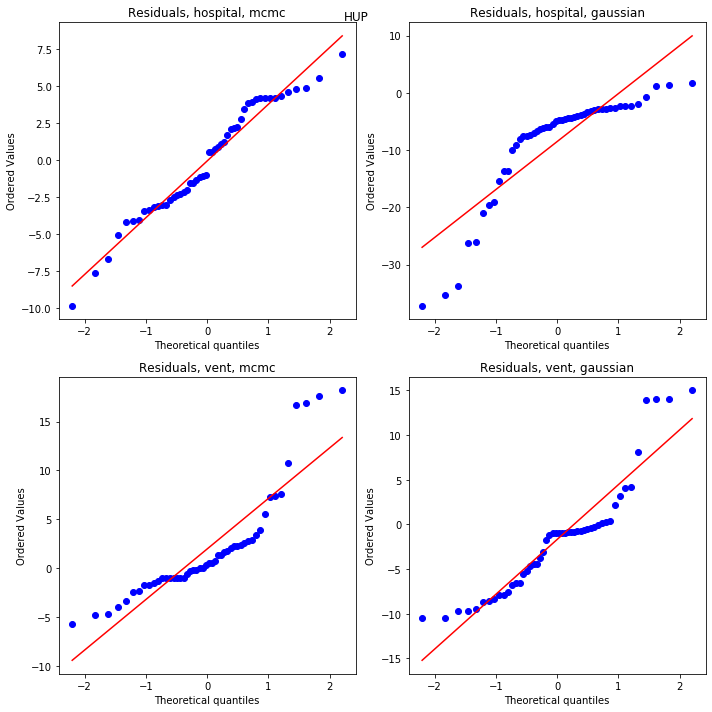

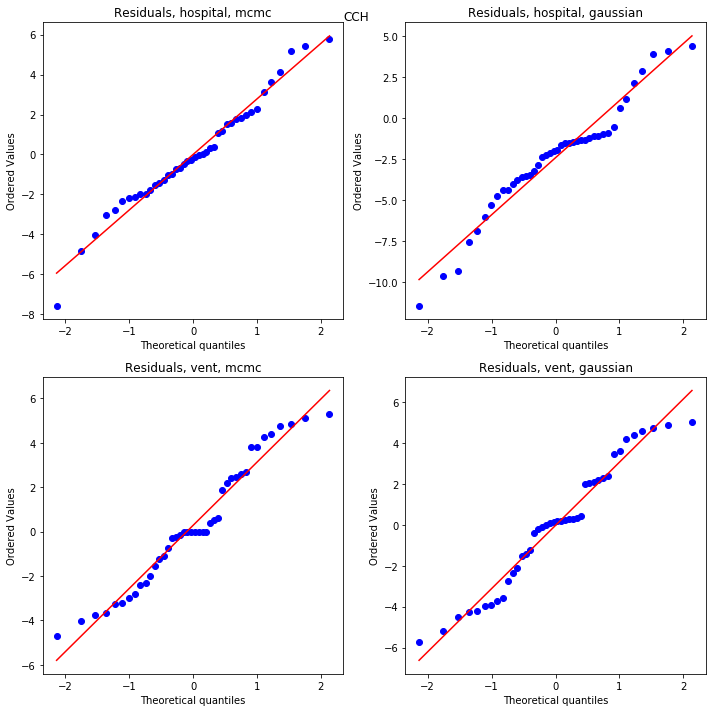

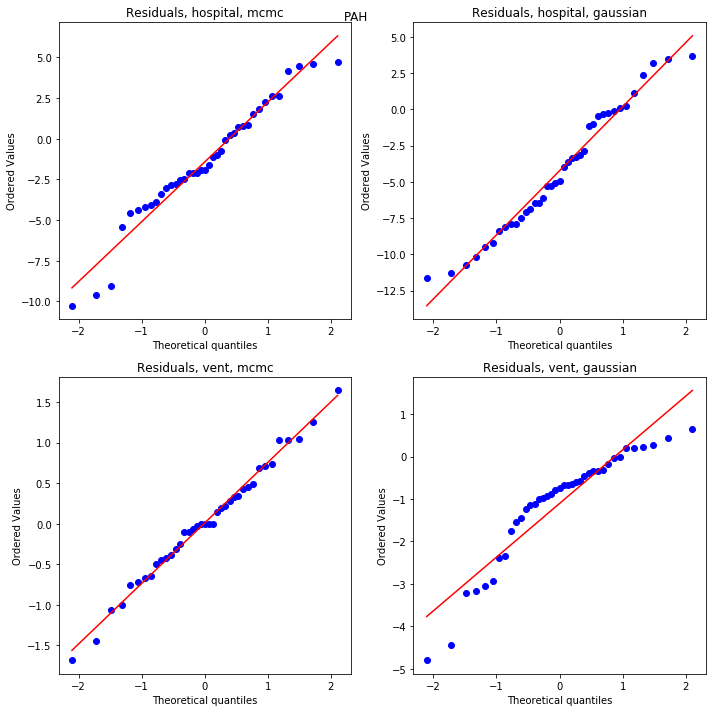

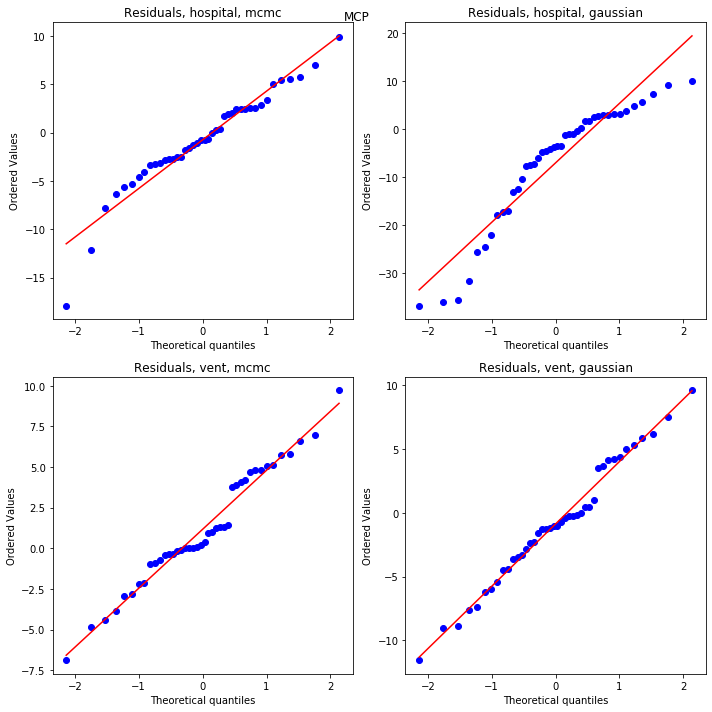

In [18]:
for i in outdicts:
    plotq(i['plotq'], i['which_hospital'])